<h1> Machine Learning using tf.estimator </h1>

**Flower Classification Case**<br>    

1. [**Introduction**](#1.-Introduction)<br>
2. [**Collection of Data**](#2.-Collection-of-Data)<br>
    [2.1 Load Data](#2.1-Load-Data)<br>
3. [**Data preparation**](#3.-Data-Preparation)<br>
    [3.1 Using Tensorflow feature_columns](#3.1-Using-Tensorflow-feature_columns)<br>
    [3.2 Input function](#3.2-Input-function)<br>
4. [**Modelling**](#4.-Modelling)<br>
    [4.1 DNNClassifier](#4.1-DNNClassifier)<br>
    [4.2 Train the model](#4.2-Train-the-model)<br>
    [4.3 Evaluate the model](#4.3-Evaluate-the-model)<br>
    [4.4 Predict with the model](#4.4-Predict-with-the-model)<br>
        

## 1. Introduction

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pandas as pd
import tensorflow as tf

from IPython.display import Image

## 2. Collection of Data

In [2]:
TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth',
                    'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']


In [3]:
def maybe_download():
    train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)
    test_path = tf.keras.utils.get_file(TEST_URL.split('/')[-1], TEST_URL)

    return train_path, test_path

def load_data(y_name='Species'):
    """Returns the iris dataset as (train_x, train_y), (test_x, test_y)."""
    train_path, test_path = maybe_download()

    train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
    train_x, train_y = train, train.pop(y_name)

    test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
    test_x, test_y = test, test.pop(y_name)

    return (train_x, train_y), (test_x, test_y)


###  2.1 Load Data

In [4]:
(train_x, train_y), (test_x, test_y) = load_data()

### What are the features?

In [5]:
train_x.head()

SepalLength  SepalWidth  PetalLength  PetalWidth
0          6.4         2.8          5.6         2.2
1          5.0         2.3          3.3         1.0
2          4.9         2.5          4.5         1.7
3          4.9         3.1          1.5         0.1
4          5.7         3.8          1.7         0.3

In [6]:
len(train_x)

120

### What is the label?

In [7]:
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [8]:
len(train_y)

120

### dataset sample

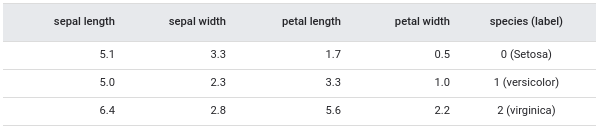

In [9]:
Image(filename='bunga.png', width=1000, height=1000)

## 3. Data Preparation

### 3.1 Using Tensorflow feature_columns

A feature column is an object describing how the model should use raw input data from the features dictionary. When you build an Estimator model, you pass it a list of feature columns that describes each of the features you want the model to use. The tf.feature_column module provides many options for representing data to the model.<br>
https://www.tensorflow.org/guide/feature_columns

In [10]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train_x.keys():
    print(key)
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

SepalLength
SepalWidth
PetalLength
PetalWidth


In [11]:
my_feature_columns

[_NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

### 3.2 Input function

Now that we have prepared our data structure for processing, let’s create an input function. It is creating a TF Dataset to be fed to the estimator.

In [12]:
def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    #https://www.tensorflow.org/guide/datasets
    
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
#     dataset = dataset.shuffle(buffer_size=1000).repeat().batch(batch_size)
    dataset = dataset.repeat().batch(batch_size)
    
    # Return the dataset.
    return dataset

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

## 4. Modelling

### 4.1 DNNClassifier

In [13]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
classifier_DNNClassifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 10 nodes each.
    hidden_units=[10, 10],
    # The model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppr2q1nj6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1c7ae1ad68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### 4.2 Train the model

In [14]:
# Train the Model DNNClassifier
classifier_DNNClassifier.train(
    input_fn=lambda:train_input_fn(train_x, train_y, batch_size=100),
    steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppr2q1nj6/model.ckpt.
INFO:tensorflow:loss = 179.9559, step = 1
INFO:tensorflow:global_step/sec: 807.662
INFO:tensorflow:loss = 13.212525, step = 101 (0.124 sec)
INFO:tensorflow:global_step/sec: 1064.56
INFO:tensorflow:loss = 9.346726, step = 201 (0.095 sec)
INFO:tensorflow:global_step/sec: 926.877
INFO:tensorflow:loss = 8.461821, step = 301 (0.107 sec)
INFO:tensorflow:global_step/sec: 1034.53
INFO:tensorflow:loss = 6.0275545, step = 401 (0.097 sec)
INFO:tensorflow:global_step/sec: 1144.05
INFO:tensorflow:loss = 6.25166, step = 501 (0.088 sec)
INFO:tensorflow:global_step/sec: 1150.79
INFO:tensorflow:loss = 6.7221518, step = 601 (0.087 sec)
INFO:tensorflow:global_step/sec: 1187.58
INFO:tensorflow:loss 

Here we wrap up our input_fn call in a **lambda** to capture the arguments while providing an input function that takes no arguments, as expected by the Estimator. The steps argument tells the method to stop training after a number of training steps.

### 4.3 Evaluate the model

Now that the model has been trained, we can get some statistics on its performance. The following code block evaluates the accuracy of the trained model on the test data:

In [15]:
# Evaluate the model.
eval_result = classifier_DNNClassifier.evaluate(
    input_fn=lambda:eval_input_fn(test_x, test_y, batch_size=100))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-12-11:22:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppr2q1nj6/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-08-12-11:22:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.96666664, average_loss = 0.066256985, global_step = 1000, loss = 1.9877095
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmppr2q1nj6/model.ckpt-1000

Test set accuracy: 0.967



### 4.4 Predict with the model

In [17]:
# Generate predictions from the model
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

predictions = classifier_DNNClassifier.predict(
        input_fn=lambda:eval_input_fn(predict_x,
                                      labels=None,
                                      batch_size=100))


In [18]:
for pred_dict, expec in zip(predictions, expected):
    template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')

    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print(template.format(SPECIES[class_id],
                          100 * probability, expec))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppr2q1nj6/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

Prediction is "Setosa" (99.7%), expected "Setosa"

Prediction is "Versicolor" (99.8%), expected "Versicolor"

Prediction is "Virginica" (97.9%), expected "Virginica"


## thank you<br><br>

$\textbf{Arif Romadhan}$ <br>
email : arif.romadhan@bukalapak.com<br>
telegram : @SiAnakBatu<br>

reference :<br> 
https://www.tensorflow.org/guide/premade_estimators<br>
https://medium.com/@vincentteyssier/tensorflow-estimator-tutorial-on-real-life-data-aa0fca773bb
